*   2502031785 - Andrew Nugrah
*   2502049920 - Harura Cendekia Hasanasultoni
*   2502030006 - Matthew Dipaputra Widjaja

## Case : https://www.kaggle.com/competitions/playground-series-s3e17/overview

In [1]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# load Kaggle's inputs
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


## Import Data

In [2]:
import math
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
train_path = "/kaggle/input/playground-series-s3e17/train.csv"
test_path = "/kaggle/input/playground-series-s3e17/test.csv"

tr_df = pd.read_csv(train_path)
ts_df = pd.read_csv(test_path)

In [4]:
tr_df.head()
tr_df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [5]:
ts_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [6]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [7]:
tr_df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
ts_df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,181905.500000,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,26256.302529,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,136429.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,159167.250000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,181905.500000,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,204643.750000,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,227382.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [9]:
def check_duplicate_rows(df):
    duplicate_rows = df[df.duplicated()]

    if duplicate_rows.empty:
        print("No duplicate")
    else:
        print("Duplicate rows were found")
        count = len(duplicate_rows)
        print(f"Total count of duplicate rows: {count}.")

    return df

tr_df = check_duplicate_rows(tr_df)
ts_df = check_duplicate_rows(ts_df)

No duplicate
No duplicate


In [10]:
target_col = 'Machine failure'

num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

bin_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]

cat_cols = 'Type'
cat_columns = ['Type']

## EDA

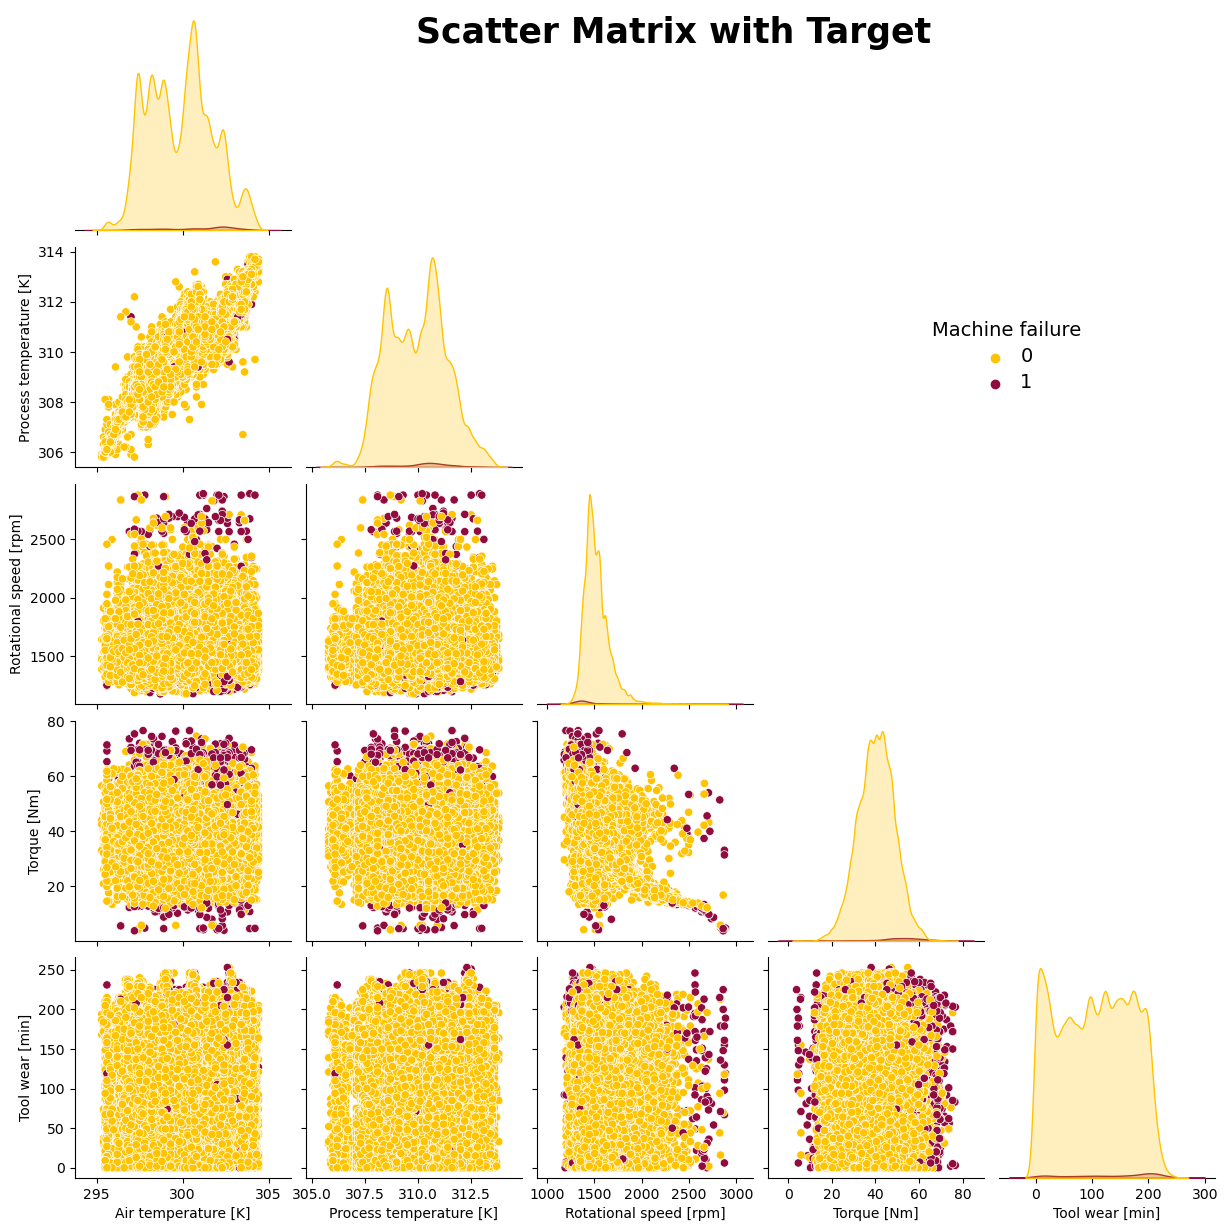

In [11]:
color_palette = ['#FFC300', '#900C3F']

pairplot = sns.pairplot(data=tr_df, x_vars=num_cols, y_vars=num_cols, hue=target_col, corner=True, palette=color_palette)

pairplot._legend.set_bbox_to_anchor((0.8, 0.7))
pairplot._legend.set_title(target_col)
pairplot._legend.loc = 'upper center'
pairplot._legend.get_title().set_fontsize(14)
for text_item in pairplot._legend.get_texts():
    text_item.set_fontsize(14)

plt.suptitle('Scatter Matrix with Target', ha='center', fontweight='bold', fontsize=25, y=0.98)
plt.show()

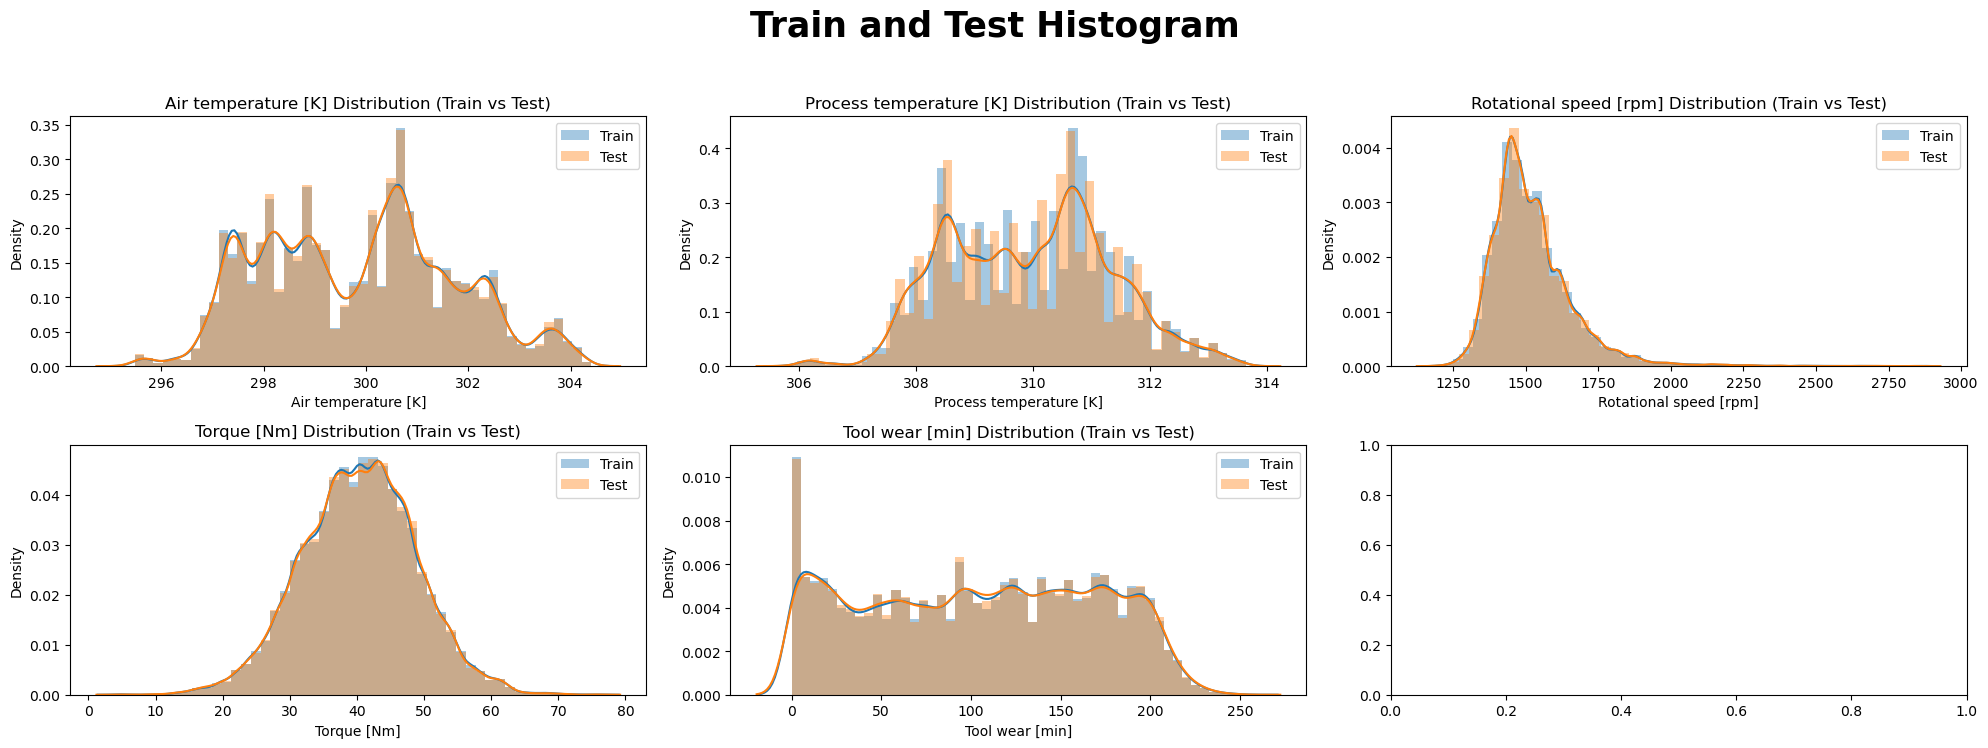

In [12]:
def plot_histograms(tr_df, ts_df, target_col, n_cols=3):
    n_rows = (len(tr_df.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(tr_df.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(tr_df[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.distplot(ts_df[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    fig.suptitle(f'Train and Test Histogram\n\n', ha='center', fontweight='bold', fontsize=25, y=0.93)
    plt.tight_layout()
    plt.show()

plot_histograms(tr_df[num_cols], ts_df[num_cols], target_col, n_cols=3)

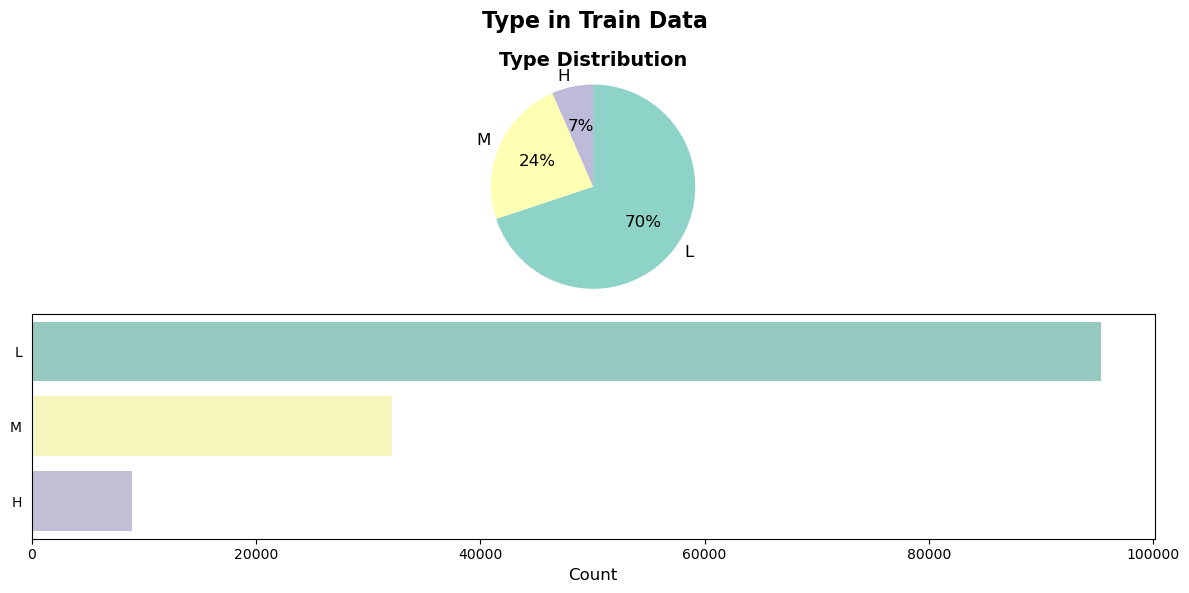

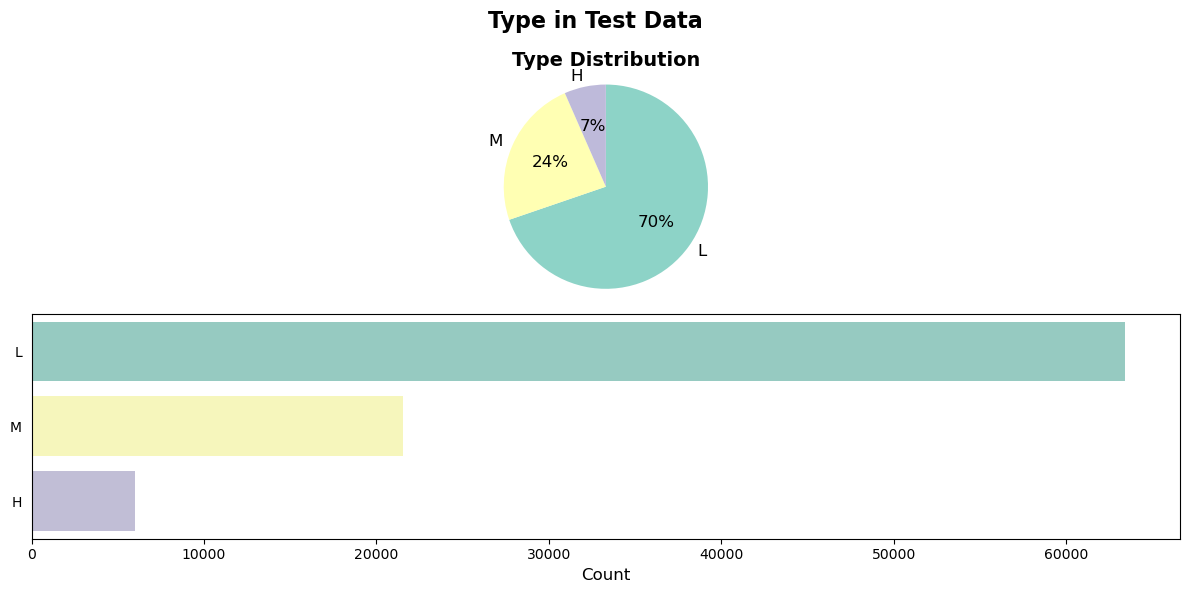

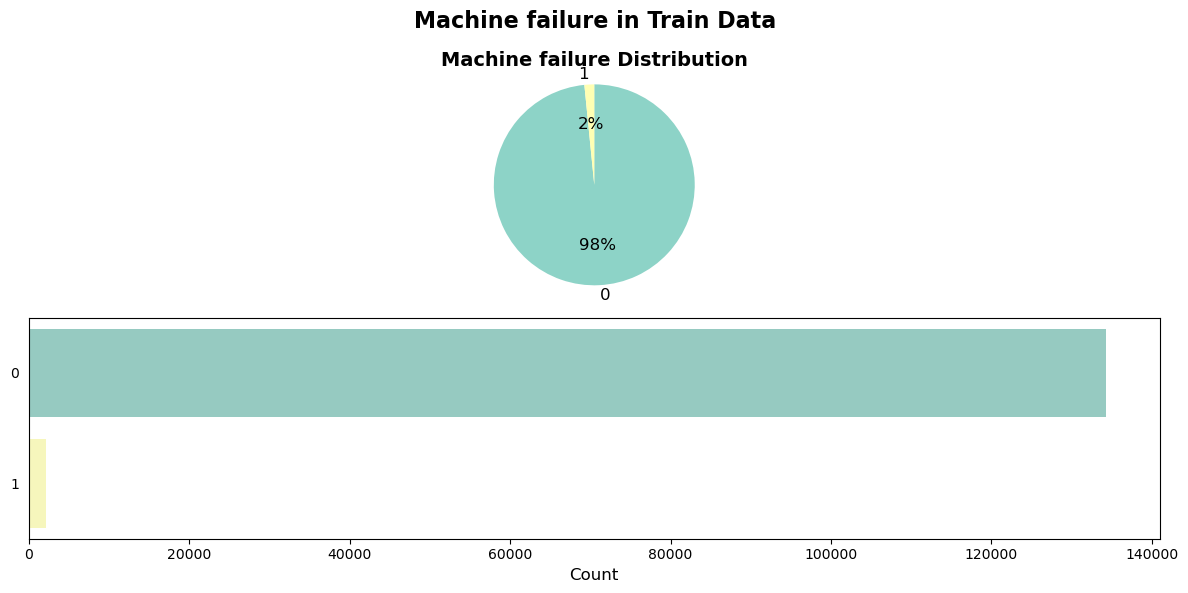

In [13]:
def plot_target_feature(df, target_col, figsize=(12, 6), palette='Set2', name='Dataset'):
    df = df.fillna('Nan')

    fig, axes = plt.subplots(2, 1, figsize=figsize)

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df[target_col].unique()))
    axes[0].pie(
        df[target_col].value_counts(),
        labels=df[target_col].unique(),
        startangle=90,
        counterclock=False,
        autopct='%1.f%%',
        textprops={'size': 12, 'color': 'black'},
        colors=pie_colors
    )
    axes[0].axis('equal')  # Fix the aspect ratio to make the pie chart circular
    axes[0].set_title(f'{target_col} Distribution', fontsize=14, fontweight='bold')

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df,
        y=target_col,
        ax=axes[1],
        palette=bar_colors
    )
    axes[1].set_xlabel('Count', fontsize=12)
    axes[1].set_ylabel('')
    axes[1].tick_params(labelsize=10)
    axes[1].yaxis.set_tick_params(width=0)  # Remove tick lines for y-axis

    fig.suptitle(f'{target_col} in {name}', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_target_feature(tr_df, 'Type', figsize=(12, 6), palette='Set3', name='Train Data')
plot_target_feature(ts_df, 'Type', figsize=(12, 6), palette='Set3', name='Test Data')
plot_target_feature(tr_df, target_col, figsize=(12, 6), palette='Set3', name='Train Data')

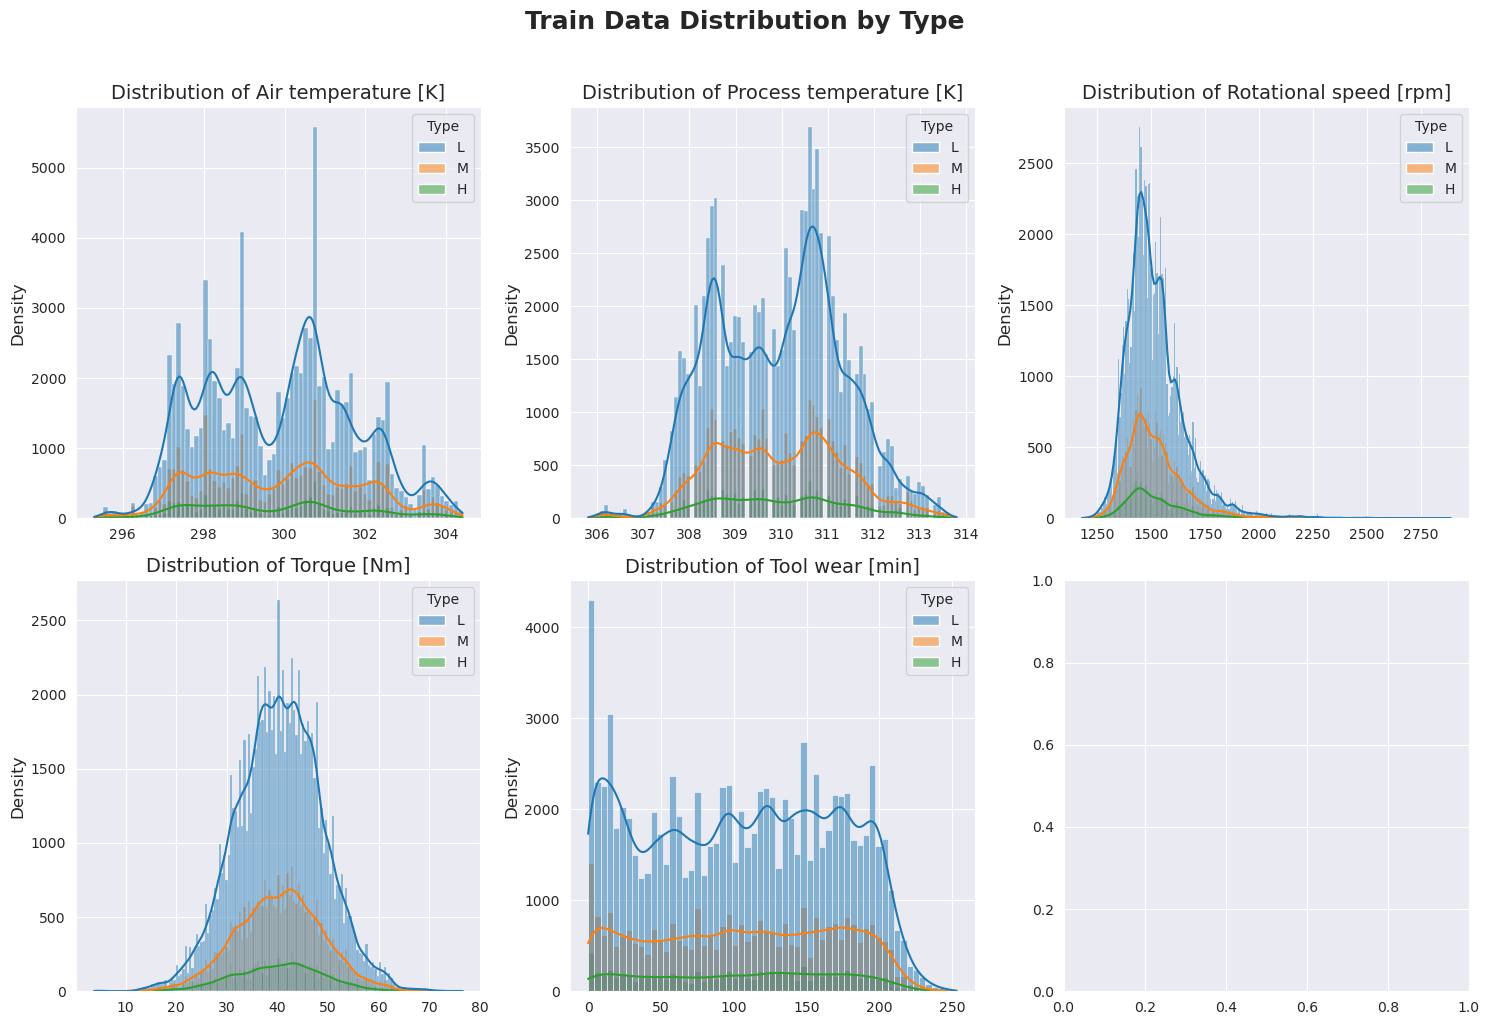

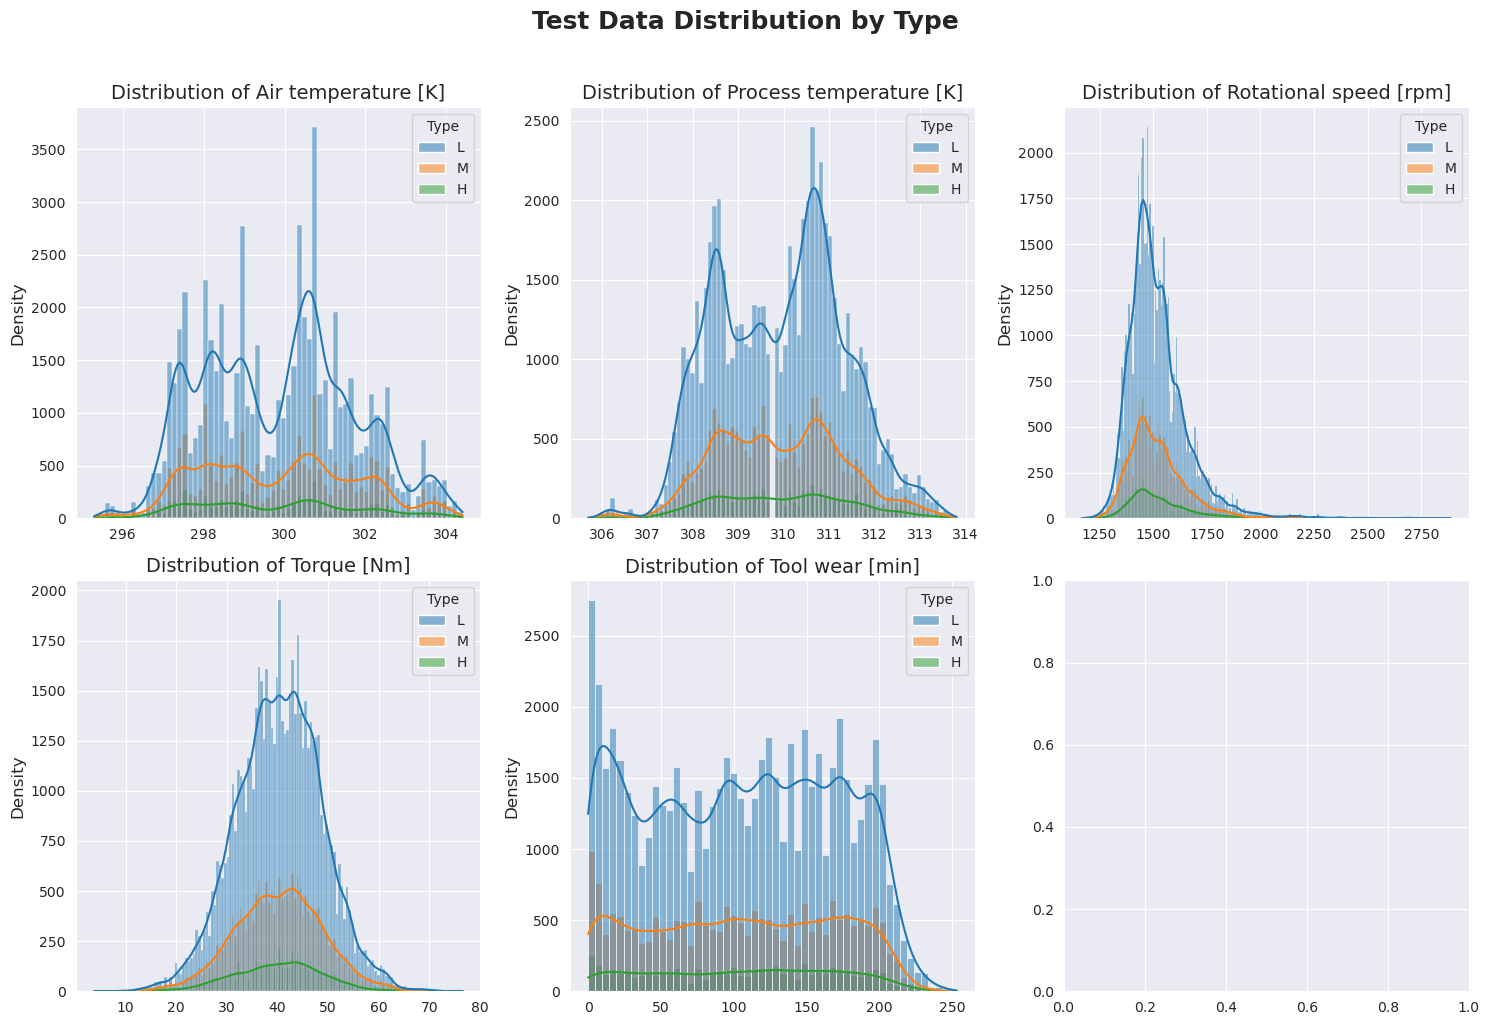

In [14]:
def plot_distribution(df, hue, title='', drop_cols=[]):
    sns.set_style('darkgrid')

    cols = df.columns.drop([hue] + drop_cols)
    n_cols = 3
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.histplot(data=df, x=var_name, kde=True, ax=ax, hue=hue)
        ax.set_title(f'Distribution of {var_name}', fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('Density', fontsize=12)
        ax.tick_params(labelsize=10)

    fig.suptitle(f'{title} Distribution by {hue}', fontweight='bold', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

plot_distribution(tr_df[num_cols+['Type']], hue='Type', title='Train Data')
plot_distribution(ts_df[num_cols+['Type']], hue='Type', title='Test Data')

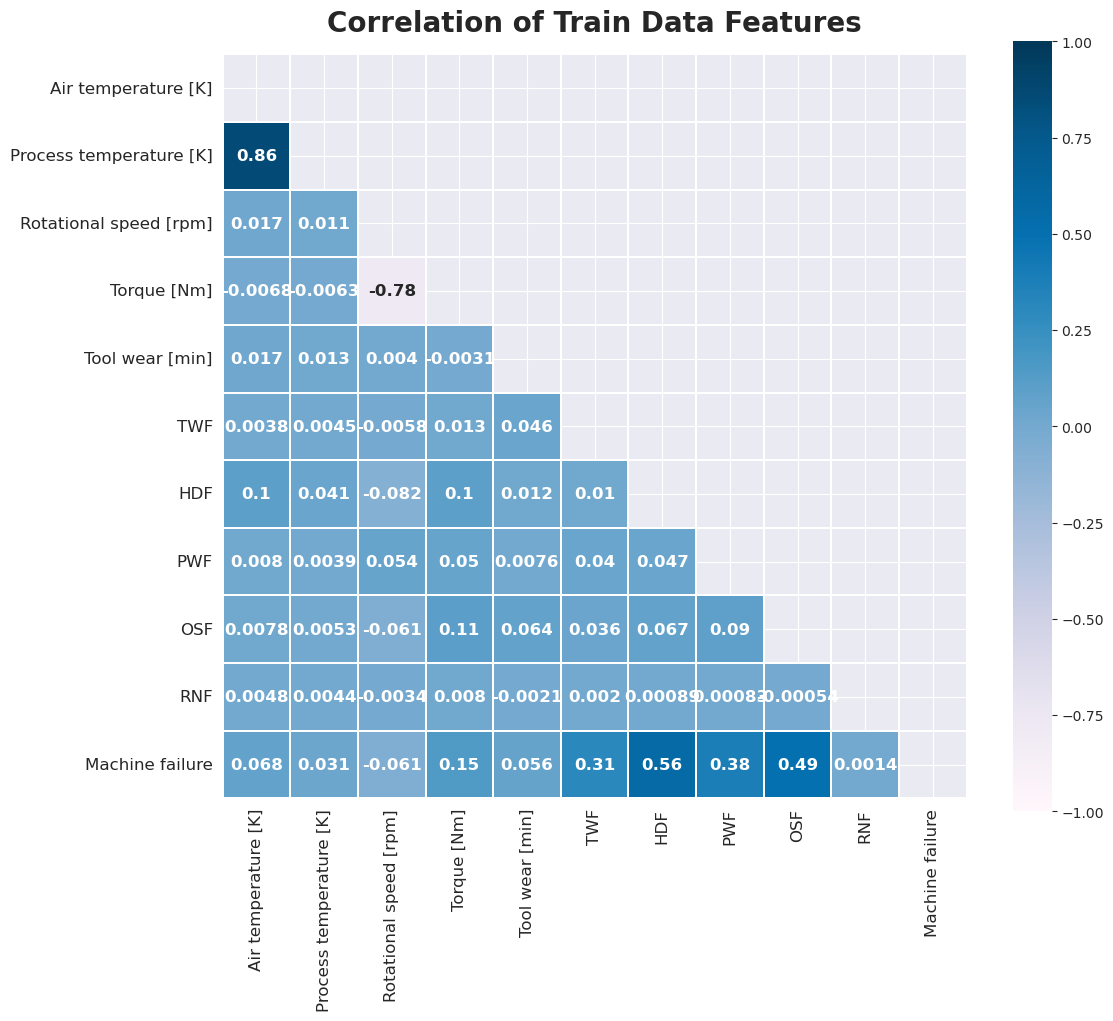

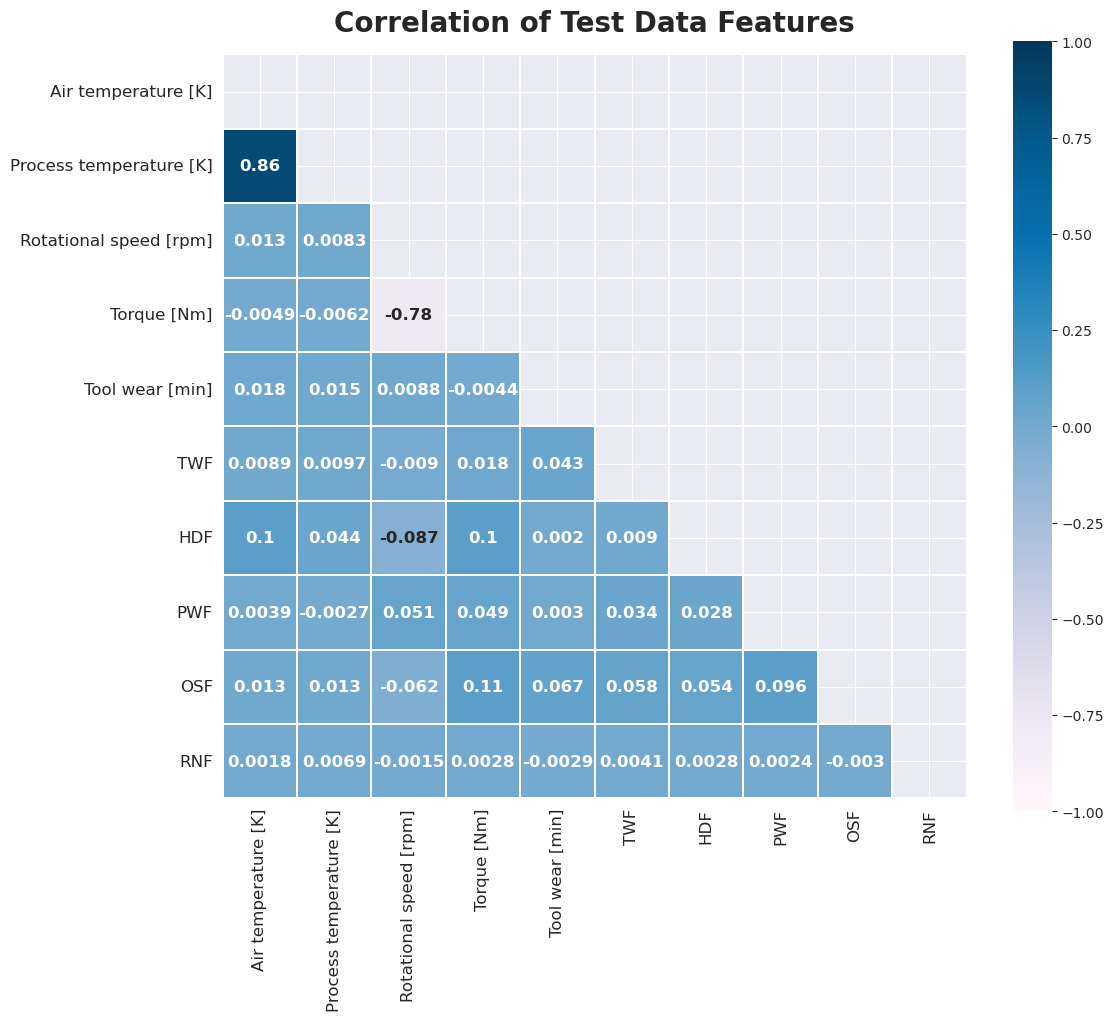

In [15]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.PuBu
    plt.figure(figsize=(12, 10))

    # Set the title and font properties
    plt.title(f'Correlation of {title} Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0,
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 12, "weight": "bold"},
                mask=mask)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(None)
    plt.ylabel(None)

plot_heatmap(tr_df[num_cols+bin_cols+[target_col]], title='Train Data')
plot_heatmap(ts_df[num_cols+bin_cols], title='Test Data')

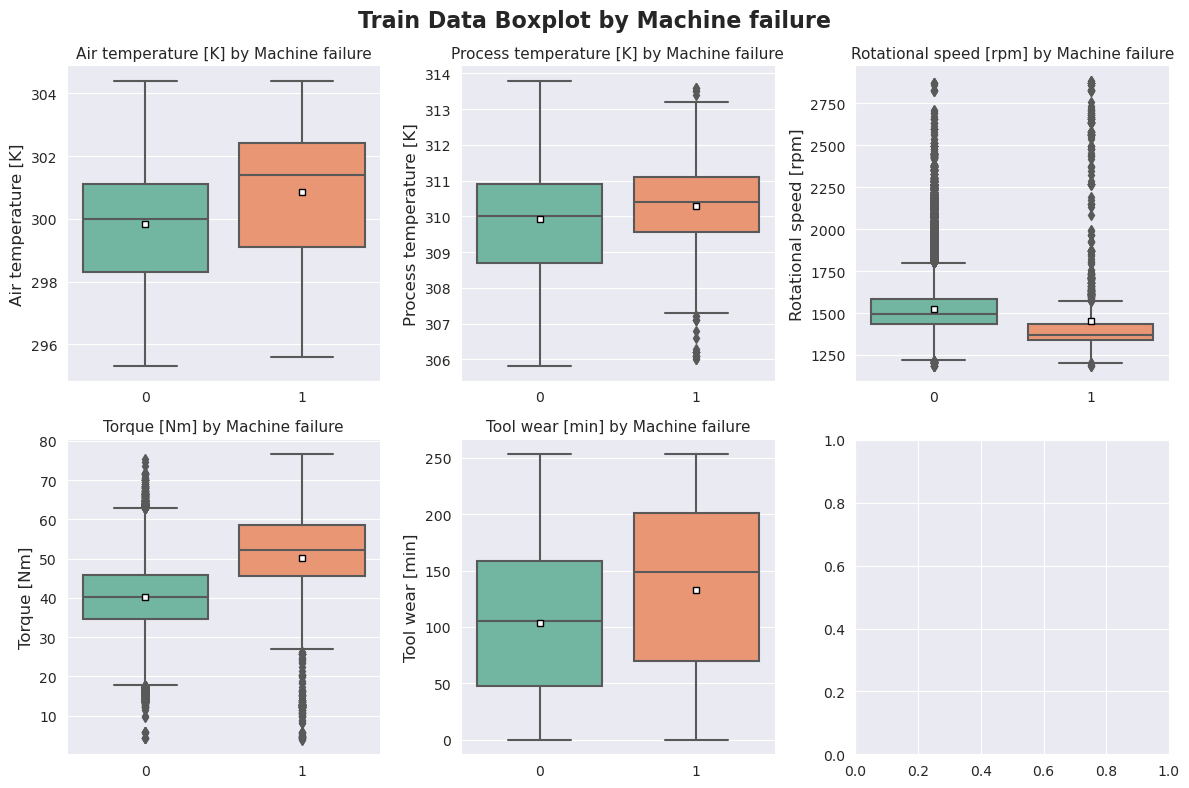

In [16]:
def plot_boxplot(df, hue, drop_cols=[], n_cols=3, title=''):
    sns.set_style('darkgrid')

    cols = df.columns.drop([hue] + drop_cols)
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4*n_rows))

    colors = sns.color_palette('Set2', n_colors=len(df[hue].unique()))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.boxplot(data=df, x=hue, y=var_name, ax=ax, palette=colors, showmeans=True,
                    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"})
        ax.set_title(f'{var_name} by {hue}', fontsize=11)
        ax.set_xlabel('')
        ax.set_ylabel(var_name, fontsize=12)
        ax.tick_params(labelsize=10)

    fig.suptitle(f'{title} Boxplot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    sns.despine()
    plt.show()

plot_boxplot(tr_df[num_cols+[target_col]], hue=target_col, n_cols=3, title='Train Data')

## Features Engineering

In [17]:
# Drop 'ProdID' and 'RNF', karena terlihat tidak relevan
tr_df = tr_df.drop(['Product ID', 'RNF'], axis=1)

In [18]:
ts_df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [19]:
ts_df = ts_df.drop(['Product ID', 'RNF'], axis=1)

In [20]:
# Create 'Power' by multiplying 'rpm' and 'torque'
tr_df['Power'] = tr_df['Rotational speed [rpm]'] * tr_df['Torque [Nm]']

# Create 'TempDiff' by subtracting 'AirTemp' from 'ProcTemp'
tr_df['TempDiff'] = tr_df['Process temperature [K]'] - tr_df['Air temperature [K]']

# Aggregate 'TWF', 'Htr_DF', 'PWF', and 'OSF' into 'Fails'
tr_df['Fails'] = tr_df[['TWF', 'HDF', 'PWF', 'OSF']].sum(axis=1)

# Perform one-hot encoding on 'Type'
one_hot = pd.get_dummies(tr_df['Type'], drop_first=True)
tr_df = tr_df.drop(['Type'], axis=1)
tr_df = pd.concat([tr_df, one_hot], axis=1)

In [21]:
# Create 'Power' by multiplying 'rpm' and 'torque'
ts_df['Power'] = ts_df['Rotational speed [rpm]'] * ts_df['Torque [Nm]']

# Create 'TempDiff' by subtracting 'AirTemp' from 'ProcTemp'
ts_df['TempDiff'] = ts_df['Process temperature [K]'] - ts_df['Air temperature [K]']

# Aggregate 'TWF', 'Hts_DF', 'PWF', and 'OSF' into 'Fails'
ts_df['Fails'] = ts_df[['TWF', 'HDF', 'PWF', 'OSF']].sum(axis=1)

# Perform one-hot encoding on 'Type'
one_hot = pd.get_dummies(ts_df['Type'], drop_first=True)
ts_df = ts_df.drop(['Type'], axis=1)
ts_df = pd.concat([ts_df, one_hot], axis=1)

## Splitting Data

In [22]:
y = tr_df.pop('Machine failure')
X = tr_df

In [23]:
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from collections import Counter
import seaborn as sns

In [24]:
# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
scaler_test = StandardScaler()
X_scaled_test = scaler_test.fit_transform(ts_df)

In [26]:
# Splitting data into train, test, and validation sets
test_size = 0.15
val_size = 0.18

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, stratify=y_train)

In [27]:
# Random under-sampling
undersampler = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Print the shape of the resampled dataset
print('Resampled dataset shape: {}'.format(Counter(y_train_resampled)))

Resampled dataset shape: Counter({0: 2994, 1: 1497})


## Model

In [28]:
xgboost_model = XGBClassifier(
    learning_rate=0.01,
    n_estimators=200,
    max_depth=6,
    subsample=0.6,
    scale_pos_weight=1,
    reg_alpha=0.01
)

In [29]:
xgboost_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy on the validation set: 0.9828
AUC on the validation set: 0.9647


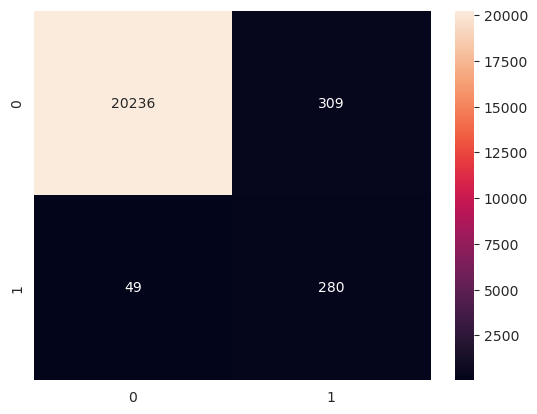

In [30]:
predictions = xgboost_model.predict(X_val)
probabilities = xgboost_model.predict_proba(X_val)[:, 1]
accuracy = accuracy_score(y_val, predictions)
auc = roc_auc_score(y_val, probabilities)

print(f'Accuracy on the validation set: {accuracy:.4f}')
print(f'AUC on the validation set: {auc:.4f}')

confusion_matrix = metrics.confusion_matrix(y_val, predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

Accuracy on the test set: 0.9806
AUC on the test set: 0.9613


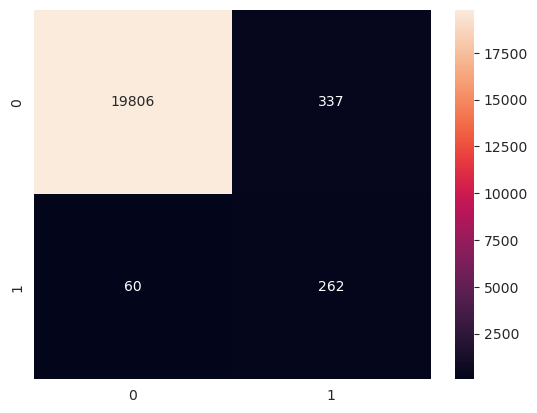

In [31]:
predictions = xgboost_model.predict(X_test)
probabilities = xgboost_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, predictions)
auc = roc_auc_score(y_test, probabilities)

print(f'Accuracy on the test set: {accuracy:.4f}')
print(f'AUC on the test set: {auc:.4f}')

cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [32]:
predictions = xgboost_model.predict(X_scaled_test)
output = pd.DataFrame({'id': ts_df.id, 'Machine failure': predictions})
output.to_csv('submission.csv', index=False)

## Refrensi :
<br>
1.   https://www.kaggle.com/code/manishkumar7432698/pse17-feature-engineering-tuning-optuna
<br>
2.   https://www.kaggle.com/code/tetsutani/ps3e17-eda-ensemble-ml-pipeline-shap#One-Model-Xgboost
<br>
3.   https://www.kaggle.com/code/yantxx/xgboost-binary-classifier-machine-failure#Initial-Analysis
<br>
4.   https://www.kaggle.com/code/miladziekanowska/machine-failure-eda-and-modeling#⚙%EF%B8%8F-Feature-engineering
<br>
5.   https://www.kaggle.com/datasets/dineshmanikanta/machine-failure-predictions

